1. Load breast cancer dataset (**structured data**)

For more details about the data: https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_breast_cancer.html

In [4]:

from sklearn.datasets import load_breast_cancer

my_data = load_breast_cancer()
X = my_data.data
y = my_data.target

print("Data loaded successfully!")
print("Features shape:", X.shape)
print("Target shape:", y.shape)

Data loaded successfully!
Features shape: (569, 30)
Target shape: (569,)


2. Visualize the data

- Only **5 points** for visualizing the data
- Use TSNE algorithm: sklearn.manifold.TSNE
- A good and simple code can be found here (they used PCA instead of TSNE): https://skp2707.medium.com/pca-on-cancer-dataset-4d7a97f5fdb8

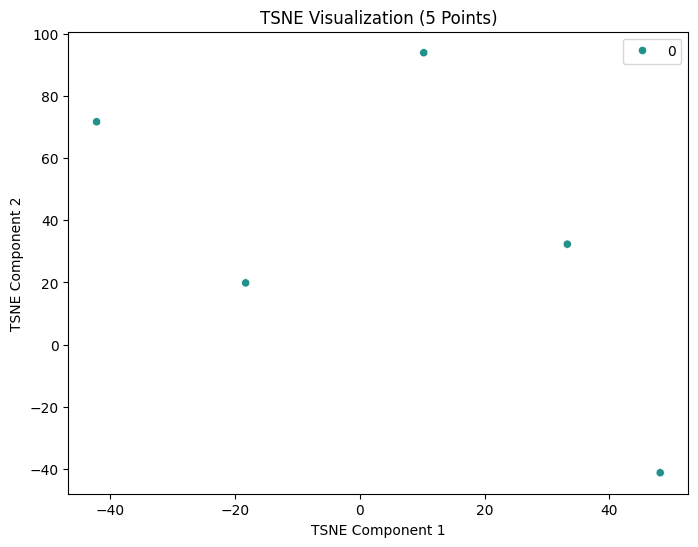

In [23]:
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reduce dataset to 5 points
X_sample = X[:5]
y_sample = y[:5]

# Apply TSNE
tsne = TSNE(n_components=2, random_state=42, perplexity=3)
X_tsne = tsne.fit_transform(X_sample)

# Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_sample, palette='viridis', legend="full")
plt.title("T-SNE Visualization (5 Points)")
plt.xlabel("T-SNE Component 1")
plt.ylabel("T-SNE Component 2")
plt.show()


3. Split **my_data** to train and test:

- Define X_train, X_test, Y_train, Y_test
- Choose **test_size** for splitting **my_data**
- Use **train_test_split** (for details: https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.train_test_split.html)

In [6]:

from sklearn.model_selection import train_test_split

# X_train, X_test, Y_train, Y_test = train_test_split(...)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Data Split!")
print(f"Training data: {X_train.shape[0]} samples")
print(f"Testing data: {X_test.shape[0]} samples")

Data Split!
Training data: 398 samples
Testing data: 171 samples


4. Train **model_decision_tree**

- Library: sklearn.tree.DecisionTreeClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize DecisionTreeClassifier options   

In [32]:
from sklearn.tree import DecisionTreeClassifier

# model_decision_tree = DecisionTreeClassifier(...)
# model_decision_tree.fit(...)
model_decision_tree = DecisionTreeClassifier(max_depth=20, random_state=20)
model_decision_tree.fit(X_train, y_train)

print("Decision Tree trained successfully!")

Decision Tree trained successfully!


5. Train model_random_forest
- Library: sklearn.ensemble.RandomForestClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize RandomForestClassifier options

In [42]:
from sklearn.ensemble import RandomForestClassifier

# model_random_forest = RandomForestClassifier(...)
# model_random_forest.fit(...)
model_random_forest = RandomForestClassifier(n_estimators=100, max_depth=64, random_state=22)
model_random_forest.fit(X_train, y_train)

print("Random Forest trained successfully!")

Random Forest trained successfully!


6. Train model_adaboost

- Library: sklearn.ensemble.AdaBoostClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize AdaBoostClassifier options

In [67]:
from sklearn.ensemble import AdaBoostClassifier

# model_adaboost = AdaBoostClassifier(...)
# model_adaboost.fit(...)
model_adaboost = AdaBoostClassifier(n_estimators=55, random_state=4)
model_adaboost.fit(X_train, y_train)

print("AdaBoost trained successfully!")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost trained successfully!


7. Evaluate model_decision_tree, model_random_forest, model_adaboost

- Library: sklearn.metrics
- Data: X_test, Y_test
- **Calculate** and **print** results of each classifier
- **Choose** the decisive metric
- **Compare** between the classifiers and declare the winner


In [68]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    return f1

# Evaluate Decision Tree
print("Decision Tree Performance:")
f1_dt = evaluate_model(model_decision_tree, X_test, y_test)

# Evaluate Random Forest
print("\nRandom Forest Performance:")
f1_rf = evaluate_model(model_random_forest, X_test, y_test)

# Evaluate AdaBoost
print("\nAdaBoost Performance:")
f1_ab = evaluate_model(model_adaboost, X_test, y_test)
# Compare F1 scores
models = {
    "Decision Tree": f1_dt,
    "Random Forest": f1_rf,
    "AdaBoost": f1_ab
}

best_model = max(models, key=models.get)
print(f"\nThe best model is: {best_model} with F1 Score = {models[best_model]:.4f}")

Decision Tree Performance:
Accuracy: 0.9357
Precision: 0.9709
Recall: 0.9259
F1 Score: 0.9479

Random Forest Performance:
Accuracy: 0.9708
Precision: 0.9640
Recall: 0.9907
F1 Score: 0.9772

AdaBoost Performance:
Accuracy: 0.9825
Precision: 0.9907
Recall: 0.9815
F1 Score: 0.9860

The best model is: AdaBoost with F1 Score = 0.9860
